In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.core import Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, Adam
from keras.layers.advanced_activations import LeakyReLU
from keras.initializers import TruncatedNormal
from keras.callbacks import EarlyStopping
from keras.layers.recurrent import SimpleRNN

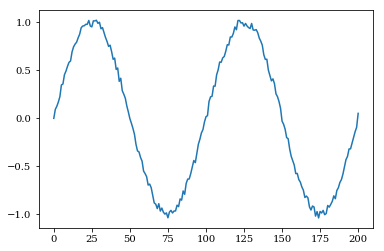

In [43]:
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)

def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise

T = 100
x = np.arange(0, 2 * T + 1)
f = toy_problem(T)
plt.plot(x,f)
plt.show()

In [44]:
length_of_sequences = 2 * T
maxlen = 25

data = []
target = []
for i in range(0, length_of_sequences - maxlen + 1):
    data.append(f[i: i + maxlen])
    target.append(f[i + maxlen])

In [45]:
X = np.array(data).reshape(len(data), maxlen, 1)
Y = np.array(target).reshape(len(data), 1)

In [46]:
N_train = int(len(data) * 0.9)
N_validation = len(data) - N_train

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=N_validation)

In [47]:
def weight_variable(shape):
    return np.random.normal(scale=0.1, size=shape)

In [48]:
n_in = len(X[0][0])
n_hidden = 20
n_out = len(Y[0])

model = Sequential()
model.add(SimpleRNN(n_hidden, kernel_initializer=weight_variable, input_shape=(maxlen, n_in)))
model.add(Dense(n_out, kernel_initializer=weight_variable))
model.add(Activation('linear'))

In [49]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [52]:
epochs = 500
batch_size = 10

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, 
          validation_data=(X_validation, Y_validation))
#         callbacks=[early_stopping])

Train on 158 samples, validate on 18 samples
Epoch 1/500
158/158 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0020
Epoch 2/500
158/158 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0020
Epoch 3/500
158/158 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0025
Epoch 4/500
158/158 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0032
Epoch 5/500
158/158 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0023
Epoch 6/500
158/158 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0021
Epoch 7/500
158/158 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0024
Epoch 8/500
158/158 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0026
Epoch 9/500
158/158 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0018
Epoch 10/500
158/158 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0019
Epoch 11/500
158/158 [============

158/158 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 89/500
158/158 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0022
Epoch 90/500
158/158 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0021
Epoch 91/500
158/158 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0019
Epoch 92/500
158/158 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0019
Epoch 93/500
158/158 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0015
Epoch 94/500
158/158 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0020
Epoch 95/500
158/158 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0018
Epoch 96/500
158/158 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0018
Epoch 97/500
158/158 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0018
Epoch 98/500
158/158 [==============================] - 0s - loss: 0.0011 - val_los

158/158 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0018
Epoch 176/500
158/158 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0025
Epoch 177/500
158/158 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0019
Epoch 178/500
158/158 [==============================] - 0s - loss: 0.0010 - val_loss: 0.0019
Epoch 179/500
158/158 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0028
Epoch 180/500
158/158 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0025
Epoch 181/500
158/158 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0019
Epoch 182/500
158/158 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0025
Epoch 183/500
158/158 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0021
Epoch 184/500
158/158 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0018
Epoch 185/500
158/158 [==============================] - 0s - loss: 9.7645

158/158 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0029
Epoch 262/500
158/158 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0021
Epoch 263/500
158/158 [==============================] - 0s - loss: 9.7879e-04 - val_loss: 0.0023
Epoch 264/500
158/158 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0020
Epoch 265/500
158/158 [==============================] - 0s - loss: 0.0010 - val_loss: 0.0024
Epoch 266/500
158/158 [==============================] - 0s - loss: 9.7449e-04 - val_loss: 0.0021
Epoch 267/500
158/158 [==============================] - 0s - loss: 0.0010 - val_loss: 0.0019
Epoch 268/500
158/158 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0020
Epoch 269/500
158/158 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0020
Epoch 270/500
158/158 [==============================] - 0s - loss: 9.8728e-04 - val_loss: 0.0023
Epoch 271/500
158/158 [==============================] - 0s - 

158/158 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0031
Epoch 348/500
158/158 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0021
Epoch 349/500
158/158 [==============================] - 0s - loss: 9.8185e-04 - val_loss: 0.0022
Epoch 350/500
158/158 [==============================] - 0s - loss: 9.7218e-04 - val_loss: 0.0024
Epoch 351/500
158/158 [==============================] - 0s - loss: 9.7935e-04 - val_loss: 0.0020
Epoch 352/500
158/158 [==============================] - 0s - loss: 9.8984e-04 - val_loss: 0.0024
Epoch 353/500
158/158 [==============================] - 0s - loss: 9.4628e-04 - val_loss: 0.0030
Epoch 354/500
158/158 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0025
Epoch 355/500
158/158 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0024
Epoch 356/500
158/158 [==============================] - 0s - loss: 0.0010 - val_loss: 0.0024
Epoch 357/500
158/158 [==============================]

158/158 [==============================] - 0s - loss: 8.2276e-04 - val_loss: 0.0020
Epoch 433/500
158/158 [==============================] - 0s - loss: 8.6159e-04 - val_loss: 0.0021
Epoch 434/500
158/158 [==============================] - 0s - loss: 9.1773e-04 - val_loss: 0.0023
Epoch 435/500
158/158 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0018
Epoch 436/500
158/158 [==============================] - 0s - loss: 9.8564e-04 - val_loss: 0.0022
Epoch 437/500
158/158 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0021
Epoch 438/500
158/158 [==============================] - 0s - loss: 9.6369e-04 - val_loss: 0.0022
Epoch 439/500
158/158 [==============================] - 0s - loss: 9.5579e-04 - val_loss: 0.0020
Epoch 440/500
158/158 [==============================] - 0s - loss: 9.7563e-04 - val_loss: 0.0018
Epoch 441/500
158/158 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0018
Epoch 442/500
158/158 [=======================

In [53]:
truncate = maxlen
Z = X[:1]
original = [f[i] for i in range(maxlen)]
predicted = [None for i in range(maxlen)]

for i in range(length_of_sequences - maxlen + 1):
    z_ = Z[-1:]
    y_ = model.predict(z_)
    sequence_ = np.concatenate((z_.reshape(maxlen, n_in)[1:], y_),
                              axis=0).reshape(1, maxlen, n_in)
    Z = np.append(Z, sequence_, axis=0)
    predicted.append(y_.reshape(-1))

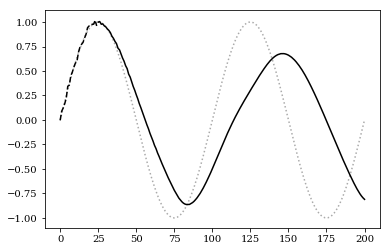

In [54]:
plt.rc('font', family='serif')
plt.figure()
plt.plot(toy_problem(T, ampl=0), linestyle='dotted', color='#aaaaaa')
plt.plot(original, linestyle='dashed', color='black')
plt.plot(predicted, color='black')
plt.show()